# A2 Bias In Data

## TL;DR   
The purpose of this exploration is to identify potential sources of bias in a corpus of human-annotated data, and describe some implications of those biases.

_Data Source:  https://figshare.com/projects/Wikipedia_Talk/16731_  
_Overview of the project:  https://meta.wikimedia.org/wiki/Research:Detox_  
_Overview of the data: https://meta.wikimedia.org/wiki/Research:Detox/Data_Release_

## AQUIRE DATA

Download all the data, using the `%%caption` magic keyword to suppress the outputs.

In [ ]:
%%capture  

# download toxicity data
!wget https://ndownloader.figshare.com/files/7394539 -O Raw_Data/toxicity_annotations.tsv
!wget https://ndownloader.figshare.com/files/7394542 -O Raw_Data/toxicity_annotated_comments.tsv
!wget https://ndownloader.figshare.com/files/7640581 -O Raw_Data/toxicity_worker_demographics.tsv

# download aggression data
!wget https://ndownloader.figshare.com/files/7394506 -O Raw_Data/aggression_annotations.tsv
!wget https://ndownloader.figshare.com/files/7038038 -O Raw_Data/aggression_annotated_comments.tsv
!wget https://ndownloader.figshare.com/files/7640644 -O Raw_Data/aggression_worker_demographics.tsv
     
# downlaod personal attacks
!wget https://ndownloader.figshare.com/files/7554637 -O Raw_Data/attack_annotations.tsv
!wget https://ndownloader.figshare.com/files/7554634 -O Raw_Data/attack_annotated_comments.tsv
!wget https://ndownloader.figshare.com/files/7640752 -O Raw_Data/attack_worker_demographics.tsv


Read in the downloaded data as a pandas dataframe.

In [19]:
import pandas as pd

# toxicity data
toxicity_annotations = pd.read_csv("Raw_Data/toxicity_annotations.tsv", delimiter="\t")
toxicity_annotated_comments = pd.read_csv("Raw_Data/toxicity_annotated_comments.tsv", delimiter="\t", index_col=0)
toxicity_worker_demographics = pd.read_csv("Raw_Data/toxicity_worker_demographics.tsv", delimiter="\t")

# aggression data
aggression_annotations = pd.read_csv("Raw_Data/aggression_annotations.tsv", delimiter="\t")
aggression_annotated_comments = pd.read_csv("Raw_Data/aggression_annotated_comments.tsv", delimiter="\t", index_col=0)
aggression_worker_demographics = pd.read_csv("Raw_Data/aggression_worker_demographics.tsv", delimiter="\t")

# personal attack data
attack_annotations = pd.read_csv("Raw_Data/attack_annotations.tsv", delimiter="\t")
attack_annotated_comments = pd.read_csv("Raw_Data/attack_annotated_comments.tsv", delimiter="\t", index_col=0)
attack_worker_demographics = pd.read_csv("Raw_Data/attack_worker_demographics.tsv", delimiter="\t")

## TOXICITY ANALYSIS

### DATA CLEANING

First, examine the types of columns that typically get labeled as toxic.   We'll consider a comment to be toxic if at least 50% of reviewers labeled it as such.

In [20]:
# labels a comment as toxic if the majority of annotators did so
toxicity_labels = toxicity_annotations.groupby('rev_id')['toxicity'].mean() > 0.5

# join the labels and comments
toxicity_annotated_comments['labeled_toxic'] = toxicity_labels

# remove newline and tab tokens
toxicity_annotated_comments['comment'] = toxicity_annotated_comments['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
toxicity_annotated_comments['comment'] = toxicity_annotated_comments['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))

If we preview the results we can verify that these comments indeed appear to be toxic.

In [21]:
# preview the results
toxicity_annotated_comments.loc[toxicity_annotated_comments['labeled_toxic'] == True].head(15)

,comment,year,logged_in,ns,sample,split,labeled_toxic
rev_id,,,,,,,
597212.0,"` After the wasted bit on his sexuality, I ha...",2003,False,article,random,test,True
1266286.0,"Erik, for crying out loud. You legally can...",2003,True,user,random,test,True
1502668.0,"BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOBS, BOOB...",2003,True,user,blocked,test,True
2187425.0,```Nazi filth`` is impolite `,2004,True,article,random,train,True
3129678.0,"Prior to Quickpolls, he would have been perma...",2004,True,user,random,train,True
3427333.0,"Hi. Yes, I'd noticed. It's always gratifing to...",2004,True,user,random,train,True
3803199.0,"Yep, Shiguy. That's me. David Hodges. I have n...",2004,True,user,random,train,True
4282271.0,Better believe it. At least I earned a Barn...,2004,True,user,random,train,True
4632658.0,"i have a dick, its bigger than yours! hahaha",2004,False,article,blocked,train,True


In [80]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
from nltk.corpus import stopwords
from collections import Counter

stopword_list = set(stopwords.words('english'))

In [87]:
from collections import Counter
Counter(" ".join(toxicity_annotated_comments.loc[toxicity_annotated_comments['labeled_toxic'] == True]['comment'].str.lower()).split()).most_common(100)

[('you', 31325),
 ('the', 20350),
 ('a', 20341),
 ('i', 19542),
 ('to', 15624),
 ('and', 15533),
 ('is', 12147),
 ('of', 11369),
 ('==', 11124),
 ('your', 9066),
 ('fuck', 8284),
 ('are', 8134),
 ('that', 7246),
 ('in', 6578),
 ('my', 6372),
 ('it', 5430),
 ('this', 4881),
 ('on', 4721),
 ('for', 4646),
 ('not', 4586),
 ('have', 4565),
 ('nigger', 3937),
 ('me', 3879),
 ('with', 3870),
 ('do', 3586),
 ('be', 3477),
 ('like', 3377),
 ('an', 3300),
 ('fucking', 3166),
 ('`', 3154),
 ('suck', 3080),
 ('am', 3064),
 ('as', 2967),
 ('what', 2952),
 ('all', 2876),
 ('will', 2801),
 ('so', 2795),
 ('go', 2753),
 ('shit', 2687),
 ('hate', 2586),
 ('if', 2555),
 ('u', 2528),
 ('faggot', 2454),
 ('just', 2445),
 ("don't", 2419),
 ('was', 2378),
 ('wikipedia', 2296),
 ('but', 2292),
 ('get', 2271),
 ('who', 2259),
 ('can', 2225),
 ('or', 2216),
 ('about', 2062),
 ('no', 2056),
 ('know', 2016),
 ('he', 1965),
 ('fat', 1937),
 ('by', 1899),
 ('from', 1864),
 ('die', 1803),
 ('gay', 1767),
 ('becaus

In [33]:
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'

In [41]:
wordlist = Counter(" ".join(toxicity_annotated_comments.loc[toxicity_annotated_comments['labeled_toxic'] == True]['comment'].str.lower()).split()).most_common(100)

for item in wordlist:
    if item[0] not in stopword_list:
        print(item)

('==', 11124)
('fuck', 8284)
('nigger', 3937)
('like', 3377)
('fucking', 3166)
('`', 3154)
('suck', 3080)
('go', 2753)
('shit', 2687)
('hate', 2586)
('u', 2528)
('faggot', 2454)
('wikipedia', 2296)
('get', 2271)
('know', 2016)
('fat', 1937)
('die', 1803)
('gay', 1767)
('moron', 1691)
('hi', 1612)
('ass', 1605)
('people', 1574)
("i'm", 1428)
('pig', 1299)
('stop', 1297)
('jew', 1292)
('one', 1288)
('penis', 1261)
('stupid', 1212)
('page', 1212)
('you,', 1203)
('think', 1173)
('-', 1154)
('sucks', 1150)
('want', 1120)
('cunt', 1037)
('wiki', 1032)
('cock', 1017)
('dont', 1014)


In [39]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

  
    

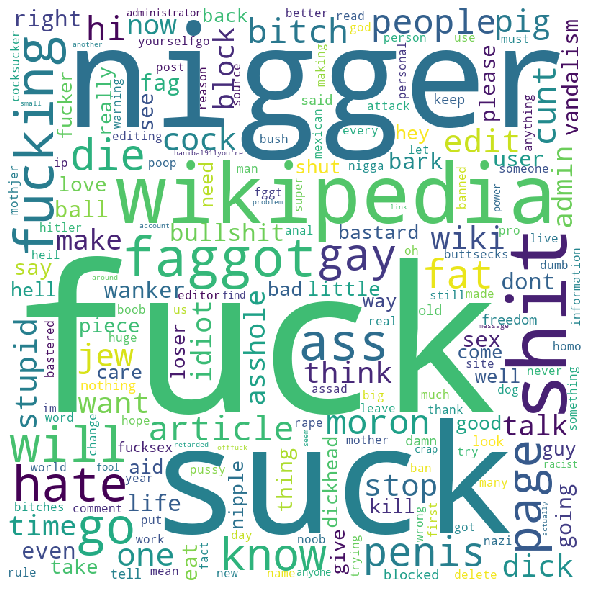

In [48]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in toxicity_annotated_comments.loc[toxicity_annotated_comments['labeled_toxic'] == True]['comment']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                collocations=False,
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Since the data is divided into three separate files, it must be joined in various ways in order to analyze.

In [4]:
joined_toxicity_demographics = toxicity_annotations.join(toxicity_worker_demographics, on="worker_id", rsuffix="_r")
joined_toxicity_comments = toxicity_annotations.join(toxicity_annotated_comments, on="rev_id", rsuffix="_r")

Quickly previewing the results of each table:

In [6]:
display(joined_toxicity_demographics.head(3))
display(joined_toxicity_comments.head(3))

,rev_id,worker_id,toxicity,toxicity_score,worker_id_r,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,1789.0,male,1.0,30-45,bachelors
1,2232.0,4000,0,0.0,NaN,NaN,NaN,NaN,NaN
2,2232.0,3989,0,1.0,NaN,NaN,NaN,NaN,NaN


,rev_id,worker_id,toxicity,toxicity_score,comment,year,logged_in,ns,sample,split,labeled_toxic
0,2232.0,723,0,0.0,This: :One can make an analogy in mathematical...,2002,True,article,random,train,False
1,2232.0,4000,0,0.0,This: :One can make an analogy in mathematical...,2002,True,article,random,train,False
2,2232.0,3989,0,1.0,This: :One can make an analogy in mathematical...,2002,True,article,random,train,False


Additionally, we can calculate a mean toxicity score for each individual and add that to the demographics table.

In [8]:
# calculate average toxicity per user
avg_worker_toxicity = joined_toxicity_demographics.groupby("worker_id")["toxicity_score"].mean()

# join the average toxicity to the demographics table
toxicity_worker_demographics = toxicity_worker_demographics.join( avg_worker_toxicity )

# preview the results
toxicity_worker_demographics.head()

,worker_id,gender,english_first_language,age_group,education,toxicity_score
0,85,female,0,18-30,bachelors,-0.208768
1,1617,female,0,45-60,bachelors,0.000000
2,1394,female,0,NaN,bachelors,0.258403
3,311,male,0,30-45,bachelors,0.689373
4,1980,male,0,45-60,masters,-0.105263


In [18]:
# look at the average toxicity by age group
toxicity_worker_demographics.groupby("age_group").toxicity_score.mean()

age_group
18-30       0.219225
30-45       0.204754
45-60       0.190176
Over 60     0.121644
Under 18    0.252275
Name: toxicity_score, dtype: float64

There is quite a bias in the toxicity score by age group.   This becomes more apparent in graph form.   There is a direct relationship between age and the average toxicity score.

In [32]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline 

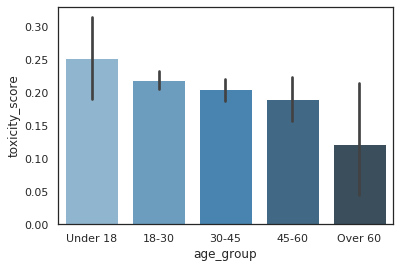

In [40]:
# set seaborn theme
sns.set_theme(style='white')

# create barplot, specify the order
ax = sns.barplot(x="age_group", 
                 y="toxicity_score", 
                 data=toxicity_worker_demographics, 
                 order=["Under 18", "18-30", "30-45", "45-60", "Over 60"],
                palette=("Blues_d"))

### TOXICITY EDA

In [ ]:
avg_worker_toxicity = joined_toxicity_demographics.groupby("worker_id")["avg_toxicity_score"].mean()
toxicity_worker_demographics = toxicity_worker_demographics.join( avg_worker_toxicity )

toxicity_worker_demographics.head()

### PERSONAL ATTACK ANALYSIS

In [ ]:
# labels a comment as an atack if the majority of annoatators did so
labels = attack_annotations.groupby('rev_id')['attack'].mean() > 0.5

# join labels and comments
attack_annotated_comments['attack'] = labels

Join the dataframes from similar datasets in order to analyze as a whole.

In [ ]:
joined_toxicity_annotations = toxicity_annotations.join(toxicity_worker_demographics, on="worker_id", rsuffix="_r")
joined_aggression_annotations = aggression_annotations.join(aggression_worker_demographics, on="worker_id", rsuffix="_r")
joined_attack_annotations = attack_annotations.join(attack_worker_demographics, on="worker_id", rsuffix="_r")

In [ ]:
joined_toxicity_annotations = toxicity_annotations.join(toxicity_annotated_comments, on="rev_id", rsuffix="_r")


In [ ]:

# labels a comment as an atack if the majority of annoatators did so
labels = attack_annotations.groupby('rev_id')['attack'].mean() > 0.5

In [ ]:

# join labels and comments
attack_annotated_comments['attack'] = labels

In [ ]:
# remove newline and tab tokens
attack_annotated_comments['comment'] = attack_annotated_comments['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
attack_annotated_comments['comment'] = attack_annotated_comments['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))

attack_annotated_comments.loc[attack_annotated_comments['attack'] == True]

Preview the results.

In [ ]:
joined_toxicity_annotations.head()

## Analysis / Visualization

Calculate the average score per worker - that worker's "toxicity bias". Is this different for different age groups?

In [ ]:
avg_worker_toxicity = joined_toxicity_annotations.groupby("worker_id")["toxicity_score"].mean()
toxicity_worker_demographics = toxicity_worker_demographics.join(avg_worker_toxicity)
toxicity_worker_demographics.head()


Now let's compute an average toxicity statistic for each group...

In [ ]:
toxicity_worker_demographics.groupby("age_group").toxicity_score.mean()

## Implications

### 

---

In [ ]:
# requires plotly install
# conda install -c anaconda plotly
import plotly.express as px



# also needs ipython widgets
conda install jupyterlab "ipywidgets=7.5"


# JupyterLab renderer support
jupyter labextension install jupyterlab-plotly@4.11.0

jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.11.0

In [11]:
import plotly.graph_objects as go
fig = go.FigureWidget(data=go.Bar(y=[2, 3, 1]))
fig

FigureWidget({
    'data': [{'type': 'bar', 'uid': 'cbec17e5-75f3-4556-9438-6eb2f1e266dd', 'y': [2, 3, 1]}],
 …

In [12]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('second_figure.html', auto_open=True)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt